# **White Noise**



> * Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

> * Mathematically, a sequence of completely random numbers with mean zero is a white noise.


White noise has...

> * Constant mean
> * Constant variance
> * Zero auto-correlation at all lags


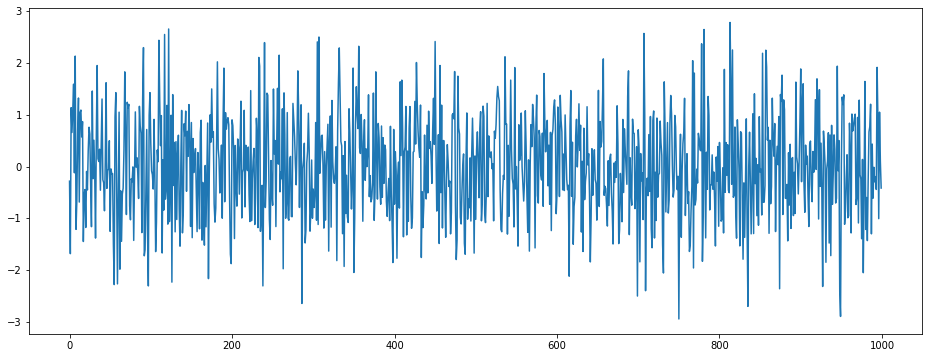

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Plotting white noise
plt.rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


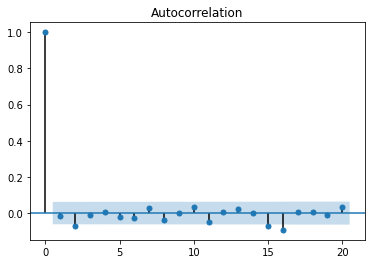

In [2]:
# Plotting autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(white_noise,lags=20)
plt.show()



See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).


# **Random Walk**

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

Pt = Pt-1 + εt

Random walks can't be forecasted because well, noise is random.

## **Generating a random walk**


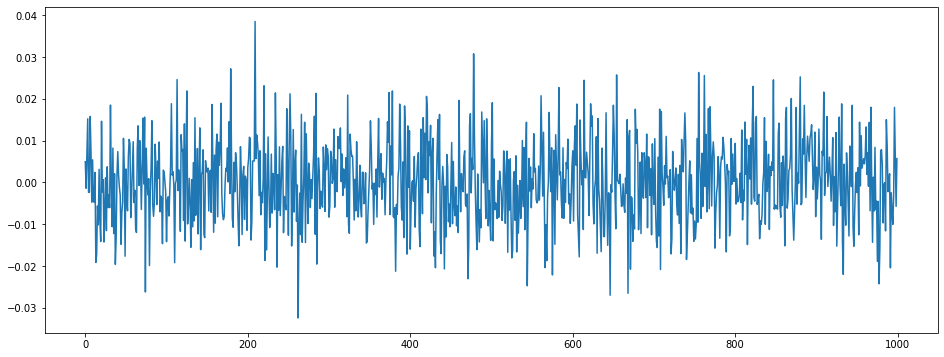

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, seed
seed(42)
plt.rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [4]:
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

#**Autoregression(AR) and Moving Average(MA) and ARIMA**

## Import The Library <a id ="30"></a>
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn: It’s a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
* statsmodels: Using statsmodels module classes and functions for time series analysis and forecasting 
   * adfuller: Augmented Dickey-Fuller
   * ACF: Auto Correlation Function
   * PACF: Partial Auto Correlation Function
   * ARIMA: Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
   * sm.tsa.seasonal.seasonal_decompose: For decomposition of time series
* rcParams: To change the matplotlib properties like figure size

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [6]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Time_Series_AirPassengers.csv')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month         object
Passengers     int64
dtype: object


Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]

## Understanding The Data <a id ="31"></a>
* Dataframe 'df' contains the time series data. There are two columns 'Month' and 'Passengers'. Month column contains the value of month in that year and passenger column contains the number of air passenger for that particular month.
* As you may have noticed 'Month' column datatype is 'Object', so we are going to convert it to 'datetime'
* To make plotting easier, we set the index of pandas dataframe 'df' to the 'Month' column so that it will act as x-axis & Passenger column as y-axis

In [8]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Passengers    int64
dtype: object


Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

## Time Series Characteristics <a id ="32"></a>

### Trend

Text(0.5, 1.0, 'Trend of the Time Series')

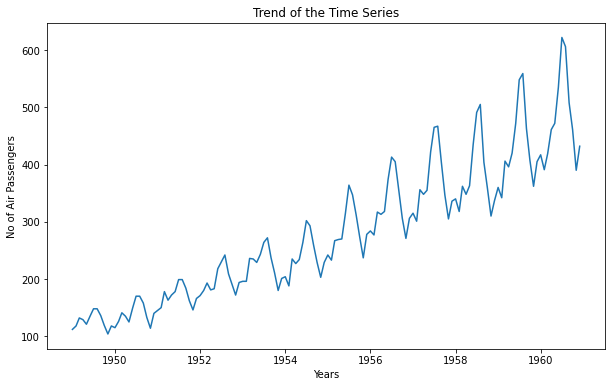

In [9]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

As you can see from above plot there is upward trend of number of passenger for every year. 

### Variance
In above graph you can clearly see that the variation is also increasing with the level of the series. You will see in the later part of this exercise how we handle the variance to increase the stationarity of the series.

### Seasonality
We can also see the graph going up and down at regular interval, that is the sign of seasonality. Let's plot the graph for few months to visualize for seasonality.

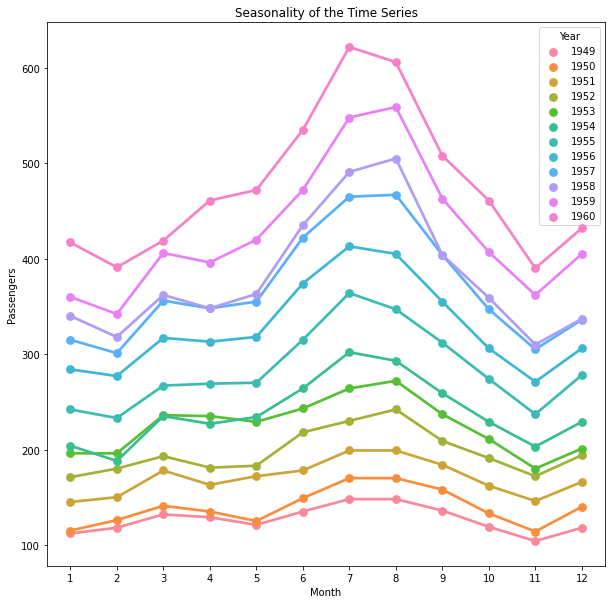

In [10]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

From above graph we can say that every year in month of July we observe maximum number of passengers and similarly minimum number of passenger in the month of November.

### Decomposition of Time Series
Let's now use the decomposition technique to deconstruct the time series data into several component like trend and seasonality for visualization of time series characteristics.

Here we are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns.

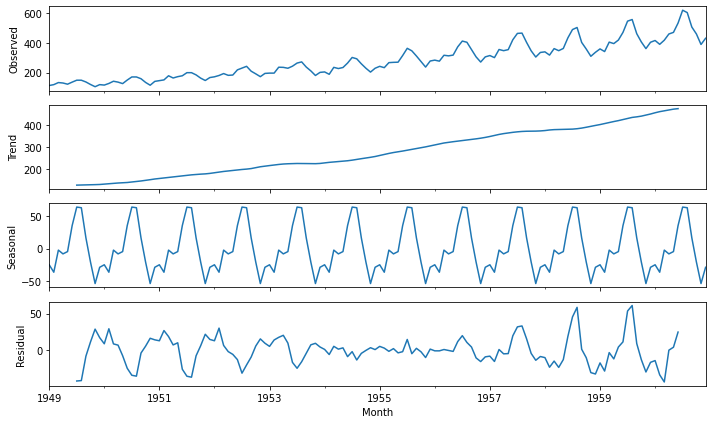

In [11]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

## Time Series Analysis <a id ="33"></a>
So our time series has variance, trend and seasonality characteristics. During our analysis we are going to try multiple techniques to make time series stationary and record the stationarity scores for each method. Finally, we will select the method, which is easy for inverse transformation easy and give best stationarity score.

### Check for Stationarity
We are going to use rolling statistics and Dickey-Fuller test to check the stationarity of the time series

In [12]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries['Passengers'])
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

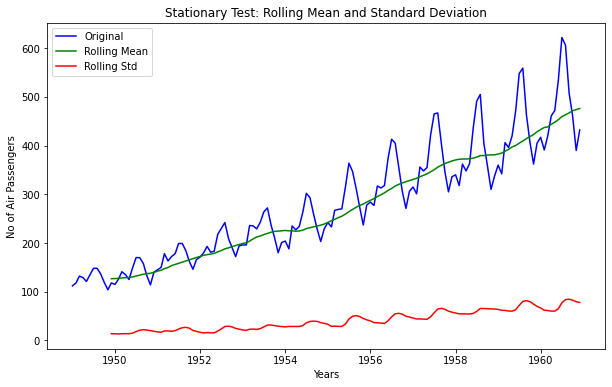

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
# Lets test the stationarity score with original series data
stationarity_test(df)

Though it's clear from visual observation that it's not a stationary series, but still lets have look at the rolling statistics and Duckey Fuller test results

* Rolling statistics: Standard deviation has very less variation but mean is increasing continuously.
* Duckey Fuller Test: Test statistic is way more than the critical values.

### Convert Non-Stationary Data to Stationary Data
Let's first use the differencing technique to obtain the stationarity.

#### Differencing
To transform the series using 'Differencing' we will use the diff() method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

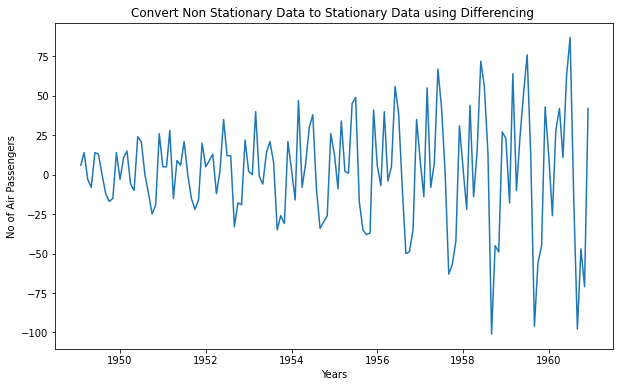

In [14]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

So from above graph its clear that differencing technique removed the trend from the time series, but variance is still there Now lets run the stationarity_test() to check the effectiveness of the 'Differencing' technique

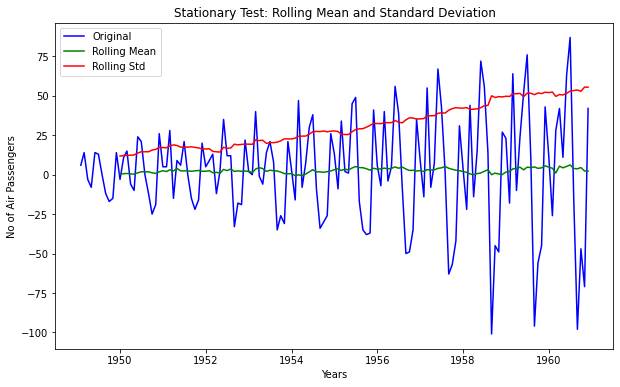

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

The rolling values appear to be varying slightly, and we can see there is slight upward trend in standard deviation. Also, the test statistic is smaller than the 10% critical but since p-value is greater than 0.05 it is not a stationary series.

Note that variance in the series is also affecting above results, which can be removed using transformation technique.

Let's also check with transformation technique


#### Transformation


Since variance is proportional to the levels, we are going to use the log transformation.

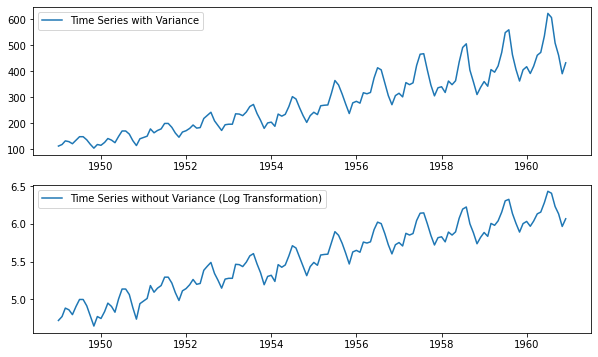

In [16]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

Since log transformation has removed the variance from series, lets use this transformed data hence forward. 
Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.
```
    df = exp(df_log)
```

Let cross-check the differencing method scores with this log transformed data again.

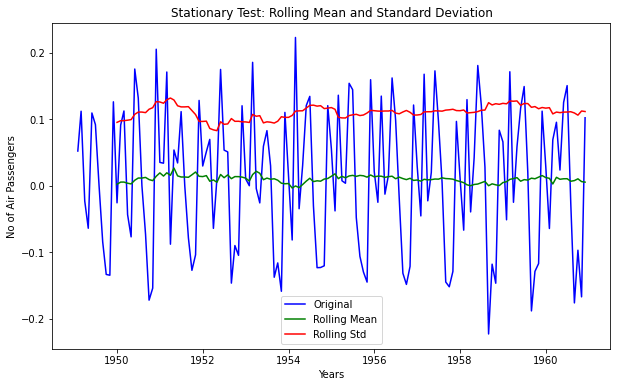

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [17]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

The rolling mean and standard deviation values are okay now. The test statistic is smaller than the 10% critical values but since p-value is greater than 0.05 it is not a stationary series.

Let's also check with Moving Average technique…

#### Moving Average

Since we have time series data from 1 Jan 1949 to 1 Dec 1960, we will define a yearly window for moving average. Window size = 12. Note that we are going to use Log transformed data.

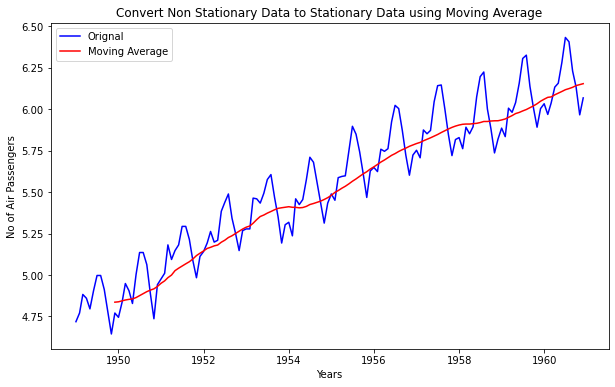

In [18]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

As you can see from above graph that data is more smooth without any variance. If we use the differencing technique with log transformed data and mean average data then we should get better stationarity scores

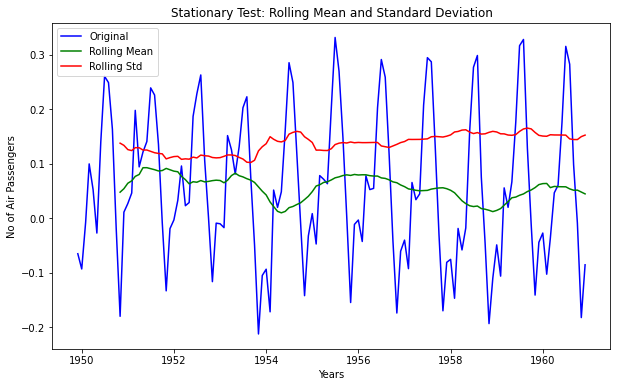

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [19]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

As expected now we are able to see some real improvements. p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

In order to increase the stationarity of the series lets try to use 'Weighted Moving Average' technique

#### Weighted Moving Average (WMA)


Weighted moving averages assign a heavier weighting to more current data points since they are more relevant than data points in the distant past.

Here we are going to use exponentially weighted moving average with parameter ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

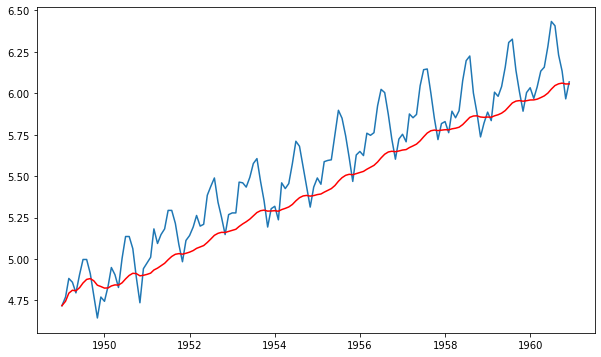

In [20]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

Notice that WMA follow's no of passenger values more closely than a corresponding Simple Moving Average which also results in more accurate trend direction. Now lets check, the effect of this on stationarity scores!

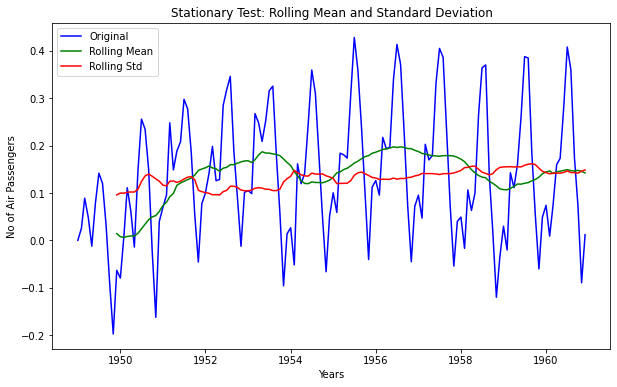

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

Test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

There is one more way to obtain better stationarity is by using the residual data from time series decomposition.

#### Decomposition of Time Series

Let's now use the decomposition technique to deconstruct the log transformed time series data, so that we can check the stationarity using residual data.

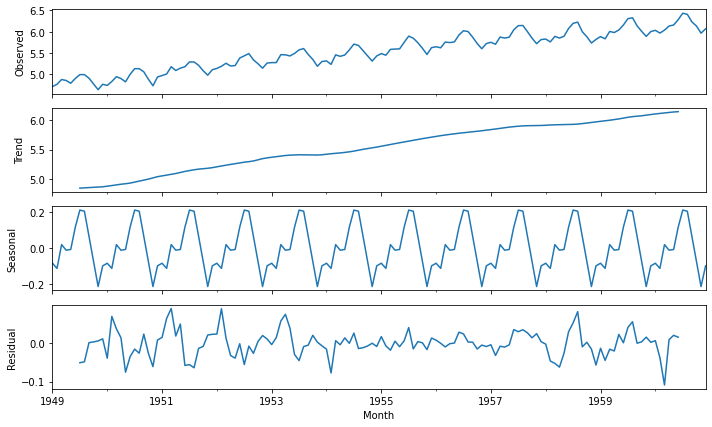

In [22]:
decomposition = sm.tsa.seasonal_decompose(df_log)
fig = decomposition.plot()

Here we can see that the trend and seasonality are separated out from log transformed data, and we can now check the stationarity of the residuals

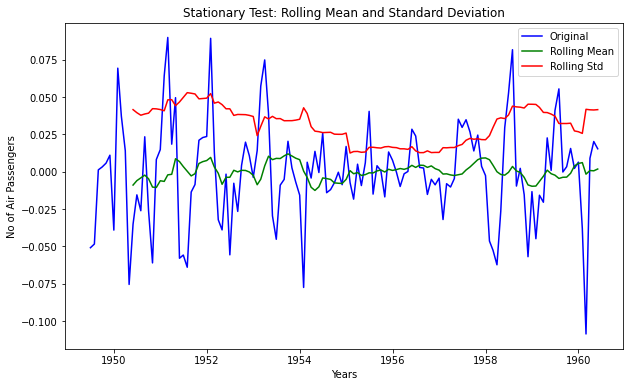

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [23]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value and p-value is almost 0. So this time series is very close to stationary. This concludes our time series analysis and data transformation to get the stationary series. Now we can start modeling it for forecast.

## Forecasting <a id ="34"></a>
* Though using residual values gives us very good results, but it's relatively difficult to add noise and seasonality back into predicted residuals in this case. 
* So we are going to make model on the time series(df_log_diff), where we have used log transformation and differencing technique. This is one of the most popular and beginner-friendly technique. As per our time series analysis 'df_log_diff' is not a perfectly stationary series, that's why we are going to use statistical models like ARIMA to forecast the data.
* Remember that ARIMA model uses three parameters, 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of integrated part. We are going to use d =1 but to find the value for p and q lets plot ACF and PACF.
* Note that since we are using d=1, first order of differencing will be performed on given series. Since first value of time series don't have any value to subtract from resulting series will have one less value from original series

### ACF and PACF Plots
* To figure out the order of AR model(p) we will use PACF function. p = the lag value where the PACF chart crosses the upper confidence interval for the first time
* To figure out the order of MA model(q) we will use ACF function. q = the lag value where the ACF chart crosses the upper confidence interval for the first time

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



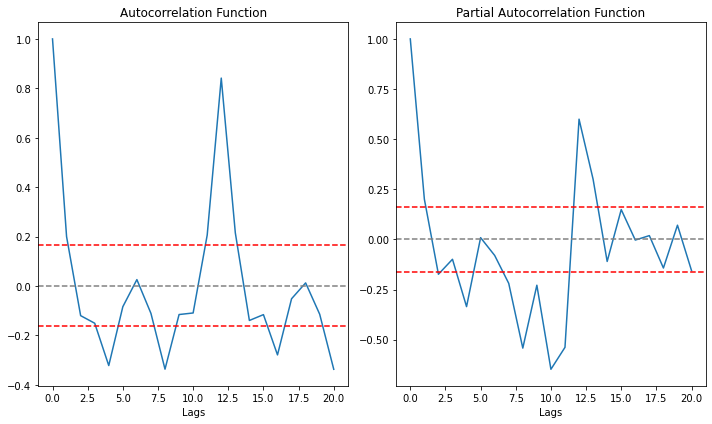

In [24]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From above graph its clear that p=2 and q=2. Now we have the ARIMA parameters values, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS(Residual Sum of Square) metric for each. Please note that here RSS is for the values of residuals and not actual series.

### AR Model
Since 'q' is MA model parameter we will keep its value as '0'.

Text(0.5, 1.0, 'AR Model, RSS: 1.5023')

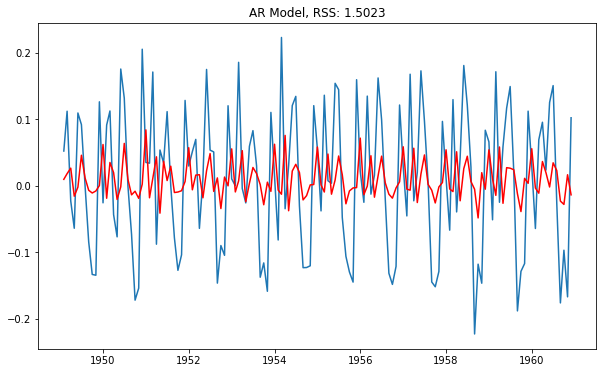

In [25]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
model = ARIMA(df_log, order=(2, 1, 0), freq = 'MS')  
results_AR = model.fit(disp= -1)# If disp < 0 convergence information will not be printed
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_log_diff['Passengers'])**2))

### MA Model
Since 'p' is AR model parameter we will keep its value as '0'.

Text(0.5, 1.0, 'MA Model, RSS: 1.4721')

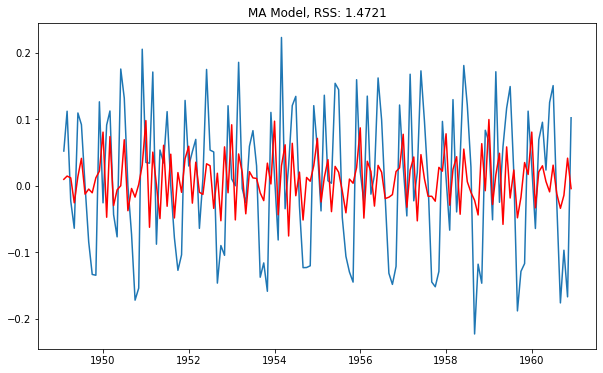

In [26]:
model = ARIMA(df_log, order=(0, 1, 2), freq = 'MS')  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff['Passengers'])**2))

### Combined Model

Text(0.5, 1.0, 'Combined Model, RSS: 1.0292')

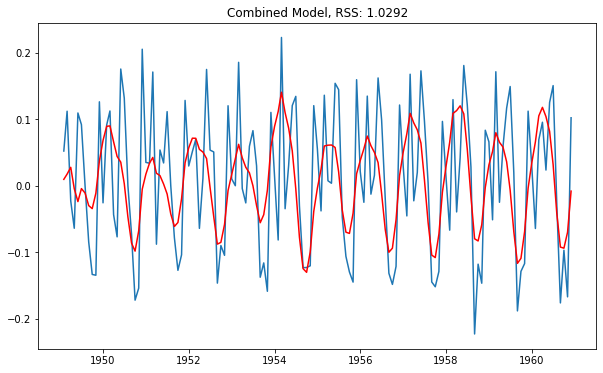

In [27]:
model = ARIMA(df_log, order=(2, 1, 2), freq = 'MS')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff['Passengers'])**2))

Here we can see that the AR and MA models have almost the same RSS score but combined is significantly better. So we will go ahead with combined ARIMA model and use it for predictions.

### Prediction and Reverse Transformation
* We will create a separate series of predicted values using ARIMA model
* Reverse transform the predicted values to get the original scale back
* Compare the predicted values with original values and plot them

In [28]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  143


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

Since we are using first order of differencing(d =1), there is no prediction available for first value (1949-02-01) of original series. In order to remove 'differencing transformation' from the prediction values we are going to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. We are going to use pandas cumsum() function for it.

A cumulative sum is a sequence of partial sums of a given sequence. For example, the cumulative sums of the sequence {a,b,c,...}, are a, a+b, a+b+c, ...

In [29]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

Above values once added to the base number will completely remove the differencing transformation. For this, lets create a series with all values as base number and add the 'predictions_diff_cumsum' to it.

In [30]:
predictions_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

So as of now we have removed the differencing transformation, now lets remove the log transformation to get the original scale back.

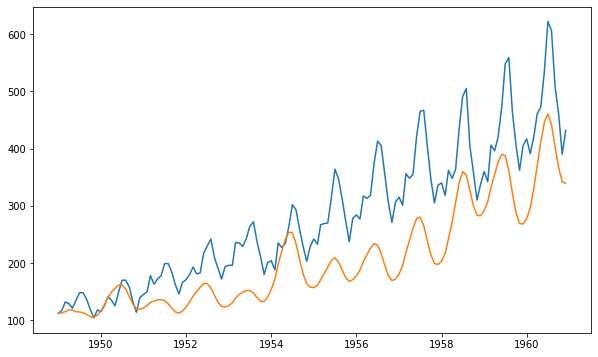

In [31]:
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)

In [32]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1).T

Month             1949-01-01  1949-02-01  ...  1960-11-01  1960-12-01
Passengers             112.0  118.000000  ...  390.000000  432.000000
Predicted Values       112.0  113.078122  ...  341.984657  339.216696

[2 rows x 144 columns]

### Future Forecasting
* We have data from 1 Jan 1949 to 1 Dec 1960. 12 years of data with passenger number observation for each month i.e. 144 total observations.
* If we want to forecast for next 5 years or 60 months then, ‘end’ count will be >  144 + 60 = 204.
* We are going to use statsmodels plot_predict() method for it

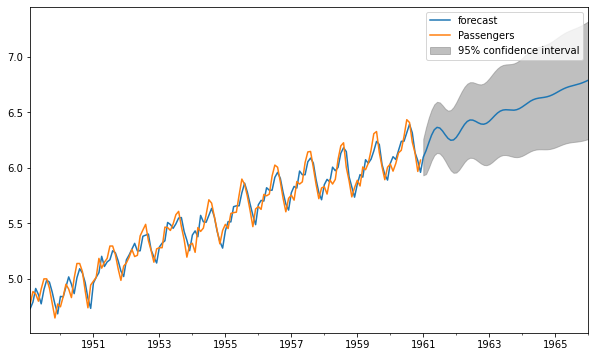

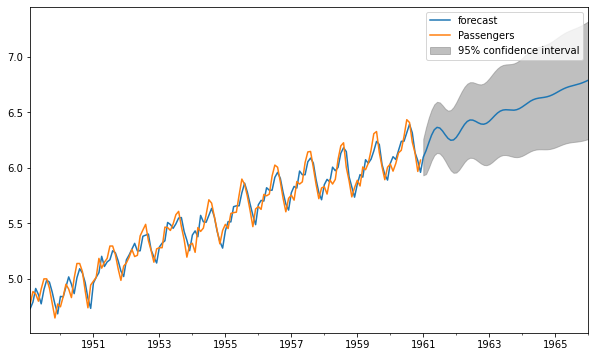

In [33]:
results_ARIMA.plot_predict(start = 1, end= 204) 

In [34]:
# Forecasted values in original scale will be
forecast_values_log_scale = results_ARIMA.forecast(steps = 60)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("1961-01-01", "1965-12-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Month'] = forecast_date_range

df_forecast[['Month', 'Forecast']]

Month    Forecast
0  1961-01-01  443.871029
1  1961-02-01  470.038319
2  1961-03-01  504.935071
3  1961-04-01  540.454867
4  1961-05-01  567.730690
5  1961-06-01  580.328026
6  1961-07-01  577.002538
7  1961-08-01  561.938734
8  1961-09-01  542.384540
9  1961-10-01  525.566676
10 1961-11-01  516.659110
11 1961-12-01  518.143301
12 1962-01-01  529.937217
13 1962-02-01  549.716831
14 1962-03-01  573.360717
15 1962-04-01  595.788995
16 1962-05-01  612.331455
17 1962-06-01  620.242409
18 1962-07-01  619.595414
19 1962-08-01  613.036652
20 1962-09-01  604.596595
21 1962-10-01  598.266403
22 1962-11-01  596.948532
23 1962-12-01  601.962506
24 1963-01-01  612.982917
25 1963-02-01  628.260063
26 1963-03-01  645.080047
27 1963-04-01  660.462167
28 1963-05-01  671.988418
29 1963-06-01  678.503886
30 1963-07-01  680.396457
31 1963-08-01  679.341379
32 1963-09-01  677.659683
33 1963-10-01  677.586291
34 1963-11-01  680.698378
35 1963-12-01  687.611300
36 1964-01-01  697.936972
37 1964-02-01  710.462134
38 1964-03-01  723.501861
39 1964-04-01  735.363824
40 1964-05-01  744.812567
41 1964-06-01  751.392178
42 1964-07-01  755.498504
43 1964-08-01  758.187889
44 1964-09-01  760.812448
45 1964-10-01  764.620686
46 1964-11-01  770.442563
47 1964-12-01  778.522962
48 1965-01-01  788.516492
49 1965-02-01  799.624757
50 1965-03-01  810.836380
51 1965-04-01  821.210110
52 1965-05-01  830.125820
53 1965-06-01  837.431766
54 1965-07-01  843.447840
55 1965-08-01  848.834100
56 1965-09-01  854.377584
57 1965-10-01  860.768812
58 1965-11-01  868.429903
59 1965-12-01  877.430976

# **Seasonal Autoregressive Integrated Moving Average(SARIMA)**


In [35]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.1MB/s 
     |████████████████████████████████| 9.5MB 12.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [36]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv(r'/content/drive/MyDrive/Rising 2021 Workshop/Notebooks/Time Series Forecasting using Baseline Methods/FB.csv')

In [38]:
df.head(10)

Date       Open       High        Low      Close  Adj Close    Volume
0  2014-12-08  76.180000  77.250000  75.400002  76.519997  76.519997  25733900
1  2014-12-09  75.199997  76.930000  74.779999  76.839996  76.839996  25358600
2  2014-12-10  76.650002  77.550003  76.070000  76.180000  76.180000  32210500
3  2014-12-11  76.519997  78.519997  76.480003  77.730003  77.730003  33462100
4  2014-12-12  77.160004  78.879997  77.019997  77.830002  77.830002  28091600
5  2014-12-15  78.459999  78.580002  76.559998  76.989998  76.989998  29396500
6  2014-12-16  76.190002  77.389999  74.589996  74.690002  74.690002  31554600
7  2014-12-17  75.010002  76.410004  74.900002  76.110001  76.110001  29203900
8  2014-12-18  76.889999  78.400002  76.510002  78.400002  78.400002  34222100
9  2014-12-19  78.750000  80.000000  78.330002  79.879997  79.879997  43335000

In [39]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [40]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [41]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [42]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

The m parameter relates to the number of observations per seasonal cycle, and is one that must be known apriori. Typically, m will correspond to some recurrent periodicity such as:

> *     7 - daily
> *    12 - monthly
> *    52 - weekly


 Fitting SARIMA for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5926.792, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5930.825, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5930.810, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5928.648, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5928.521, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5930.139, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5932.491, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5932.541, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5927.184, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.346 seconds
Model summary for  m = 1
---------------------------------------------------------------------------------------------

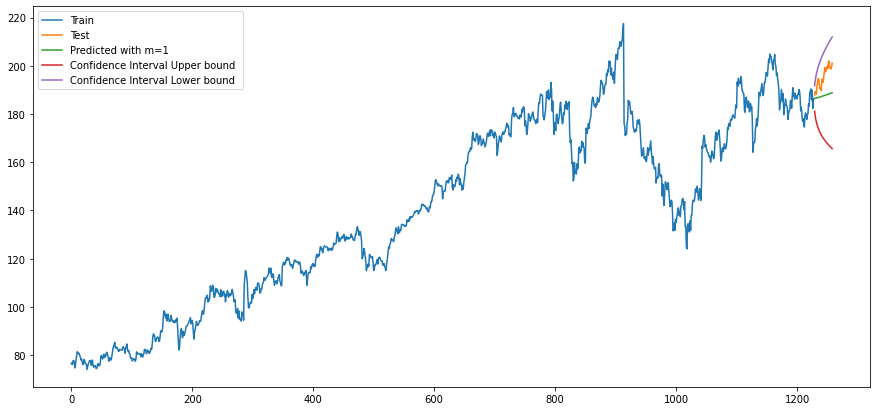

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


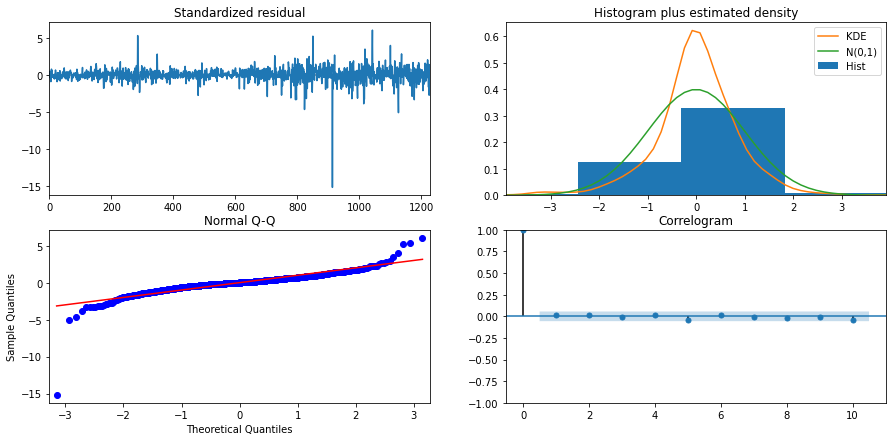

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=5930.606, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=5929.302, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=5932.751, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=5932.728, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=5928.648, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=5931.257, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=5931.254, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=5932.982, Time=1.22 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=5930.825, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=5930.810, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=5926.792, Time=0.90 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=5928.543, Time=1.42 sec
 ARIMA(1,1,1)(0,0,1)[4]

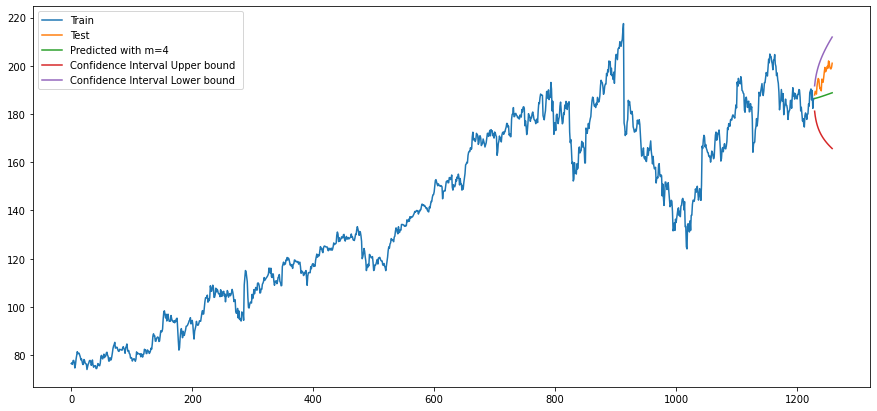

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


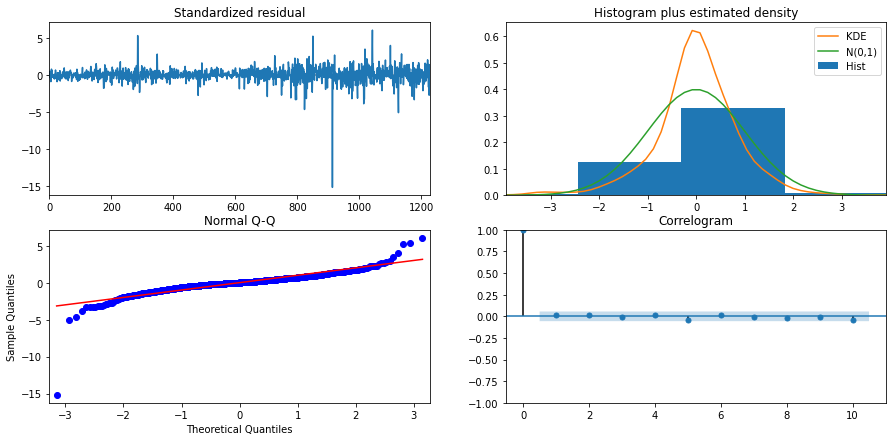

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 7
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=5926.233, Time=3.63 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5931.993, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5931.949, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5928.648, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=5928.579, Time=2.10 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=5928.583, Time=2.04 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=5930.537, Time=8.17 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=5928.907, Time=9.94 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=5926.792, Time=0.89 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=5930.503, Time=5.18 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=5930.509, Time=3.88 sec
 ARIMA(1,1,1)(2,0,2)[7]

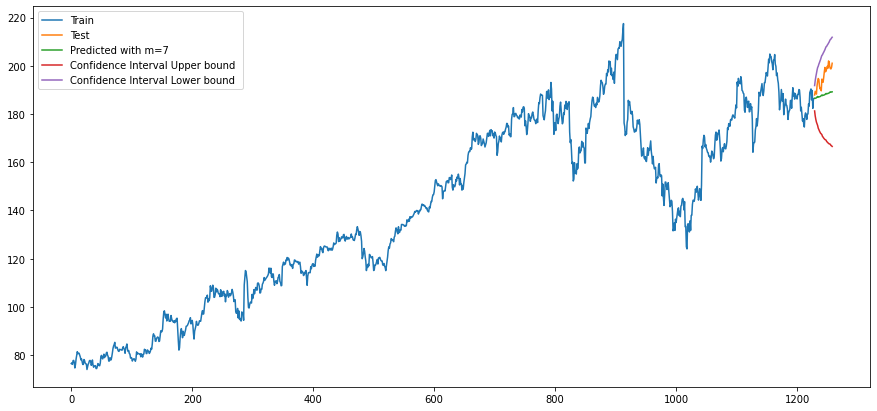

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 7


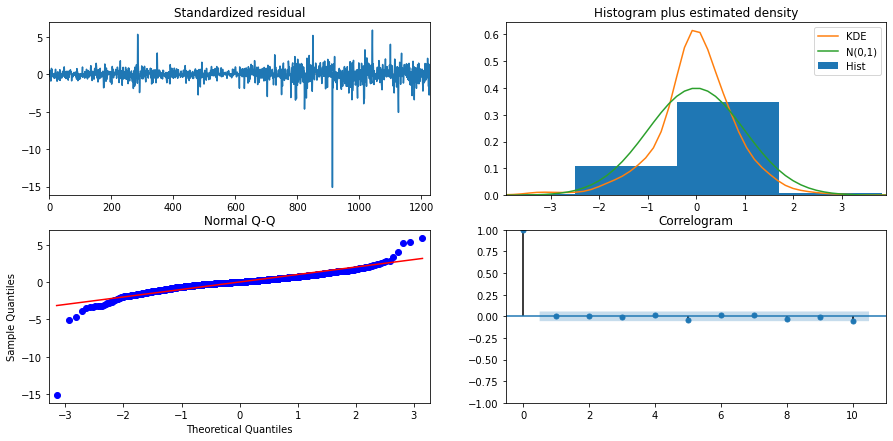

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 12
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5930.743, Time=4.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5932.613, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5932.598, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5928.648, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5931.080, Time=0.42 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5931.082, Time=0.42 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5933.079, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5930.825, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5930.810, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5926.792, Time=0.93 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5928.744, Time=3.27 sec
 ARIMA(1,1

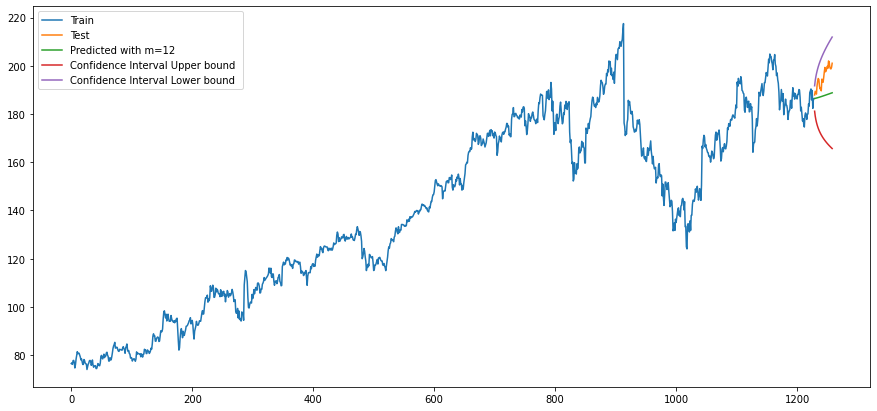

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


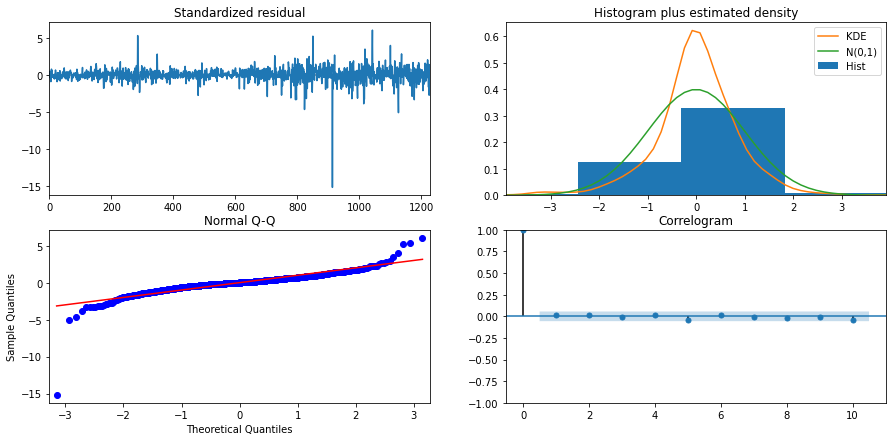

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 52
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=59.91 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=5932.550, Time=10.51 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5932.556, Time=10.63 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=5928.648, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5930.993, Time=8.00 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5931.017, Time=8.31 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=23.66 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=5930.825, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5930.810, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5926.792, Time=0.94 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5928.481, Time=35.41 sec
 ARIMA(1,1,1)(0

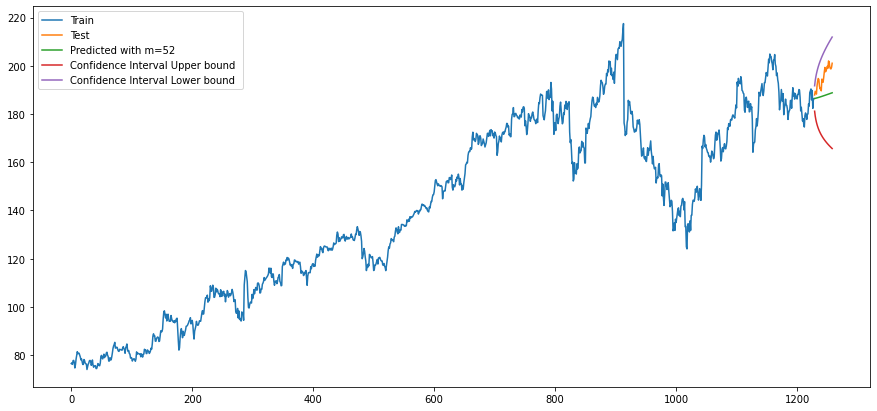

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 52


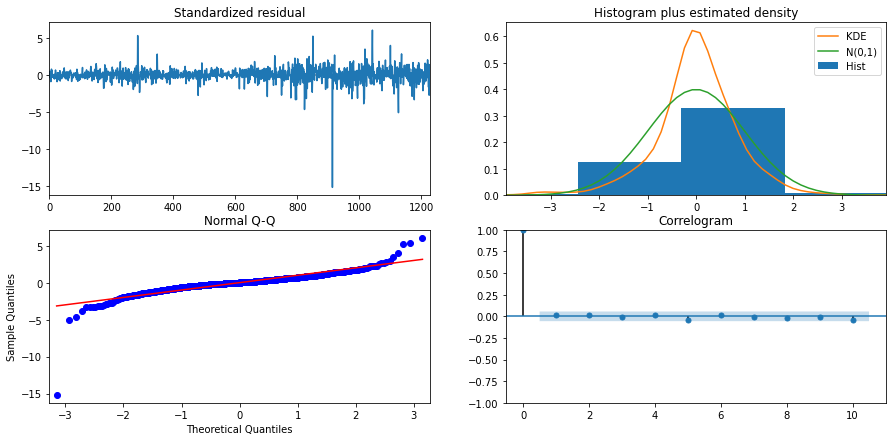

----------------------------------------------------------------------------------------------------


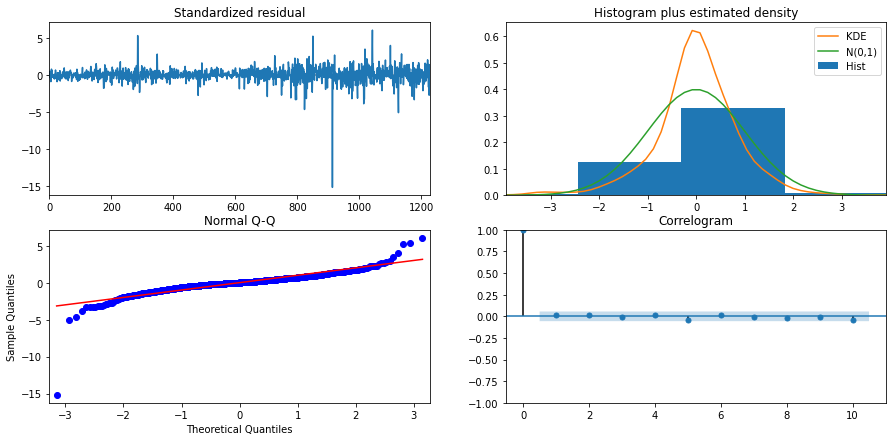

In [43]:
for m in  [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(train, start_p=1, start_q=1,
                                max_p=7, max_q=7, seasonal=True, start_P=1, start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast ,conf_int= stepwise_model.predict(n_periods=30,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(test, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(train, label='Train ')
    plt.plot(test, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    
    print("-"*100)

# **Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)**


In [44]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv(r'/content/drive/MyDrive/Rising 2021 Workshop/Notebooks/Time Series Forecasting using Baseline Methods/FB.csv')

In [46]:
df.head(10)

Date       Open       High        Low      Close  Adj Close    Volume
0  2014-12-08  76.180000  77.250000  75.400002  76.519997  76.519997  25733900
1  2014-12-09  75.199997  76.930000  74.779999  76.839996  76.839996  25358600
2  2014-12-10  76.650002  77.550003  76.070000  76.180000  76.180000  32210500
3  2014-12-11  76.519997  78.519997  76.480003  77.730003  77.730003  33462100
4  2014-12-12  77.160004  78.879997  77.019997  77.830002  77.830002  28091600
5  2014-12-15  78.459999  78.580002  76.559998  76.989998  76.989998  29396500
6  2014-12-16  76.190002  77.389999  74.589996  74.690002  74.690002  31554600
7  2014-12-17  75.010002  76.410004  74.900002  76.110001  76.110001  29203900
8  2014-12-18  76.889999  78.400002  76.510002  78.400002  78.400002  34222100
9  2014-12-19  78.750000  80.000000  78.330002  79.879997  79.879997  43335000

In [47]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [48]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [49]:
for name, column in df[['Close' ,'Open' ,'High','Low']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Open
Test Statistic                   -1.014123
p-value                           0.748078
No Lags Used                     11.000000
Number of Observations Used    1247.000000
Critical Value (1%)              -3.435605
Critical Value (5%)              -2.863861
Critical Value (10%)             -2.568005
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                   -1.255326
p-value                      

In [50]:
X = df[['Close' ]]
actualtrain, actualtest = X[0:-30], X[-30:]
exoX = df[['Open' ]]
exotrain, exotest = exoX[0:-30], exoX[-30:]

 Fitting SARIMAX for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5155.727, Time=1.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5178.246, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5157.564, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5155.602, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5176.629, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5156.191, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5153.614, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5153.760, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5154.202, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5155.603, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.65 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 9.606 seconds
Model summary for  m = 1
-------------------------------

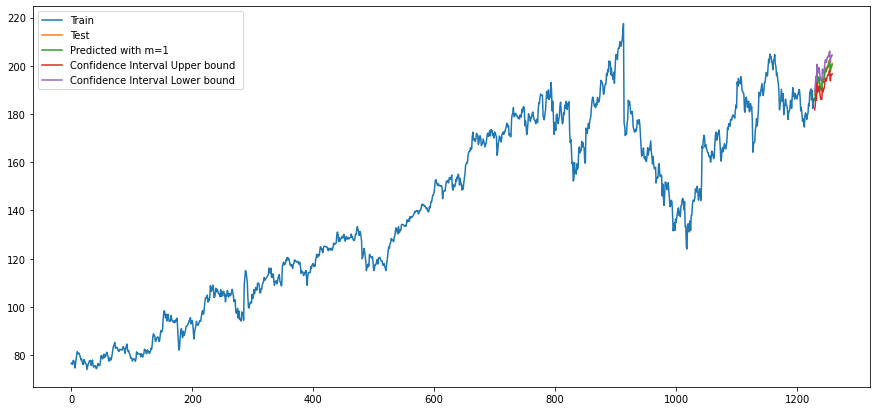

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


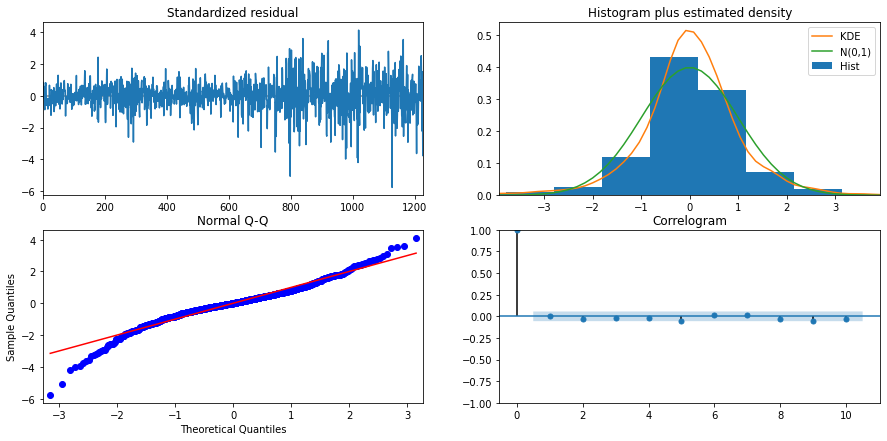

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=5158.880, Time=2.58 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=5178.246, Time=0.30 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=5159.298, Time=1.45 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=5157.178, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=5176.629, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=5155.602, Time=0.46 sec
 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=5157.322, Time=1.46 sec
 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=5158.636, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=5155.727, Time=1.26 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=5156.191, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=5157.564, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,0,1)(0,0,0)[4]    

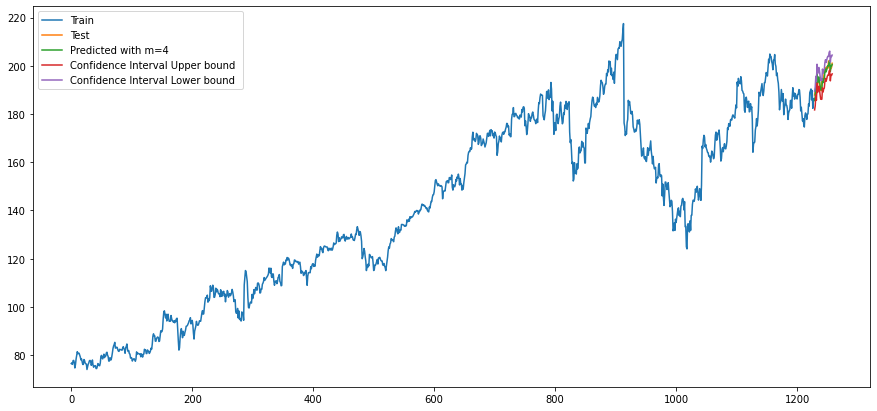

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


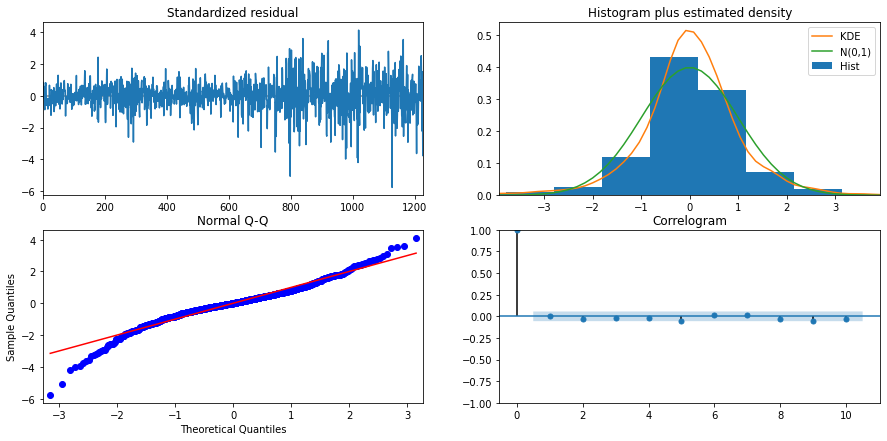

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 7
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=5159.442, Time=3.59 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5178.246, Time=0.31 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5158.762, Time=2.62 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5157.057, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=5176.629, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5155.602, Time=0.47 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=5157.097, Time=1.95 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=5159.158, Time=1.13 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=5155.727, Time=1.28 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=5156.191, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5157.564, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,1)(0,0,0)[7]    

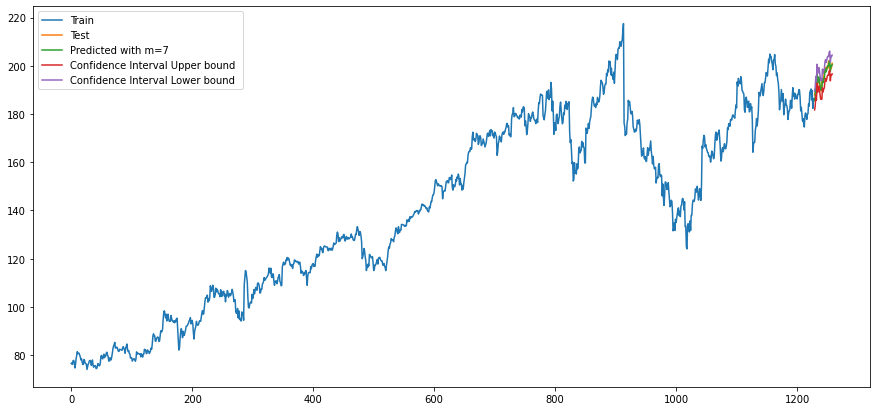

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 7


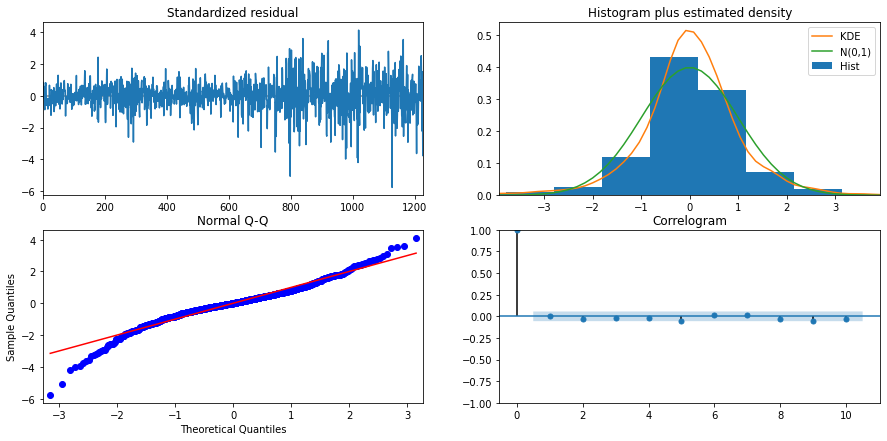

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 12
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=5158.566, Time=5.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5178.246, Time=0.32 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5158.340, Time=1.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5156.426, Time=2.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5176.629, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5155.602, Time=0.61 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=5156.262, Time=8.79 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=5158.620, Time=4.72 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=5155.727, Time=1.28 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=5156.191, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5157.564, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,0,1)(

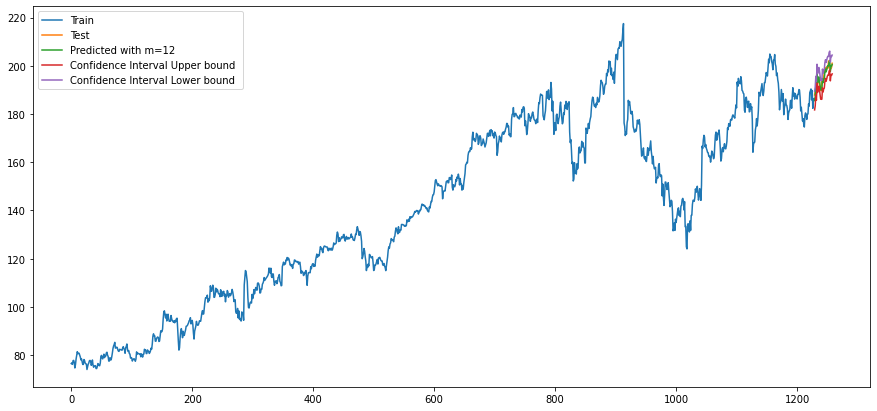

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


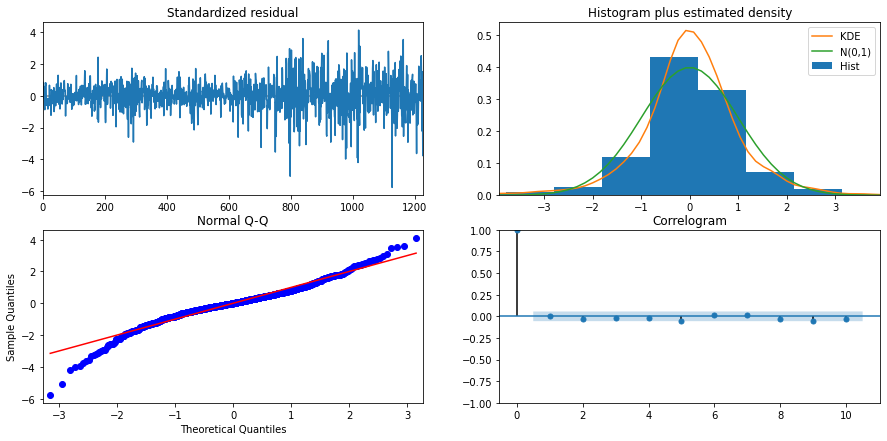

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 52
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=5159.726, Time=33.03 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=5178.246, Time=0.33 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=5159.372, Time=45.94 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=5157.610, Time=7.62 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5176.629, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=5155.602, Time=0.48 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=5157.586, Time=42.14 sec
 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=5159.551, Time=33.12 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=5155.727, Time=1.28 sec
 ARIMA(0,0,2)(0,0,0)[52] intercept   : AIC=5156.191, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=5157.564, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(0,0

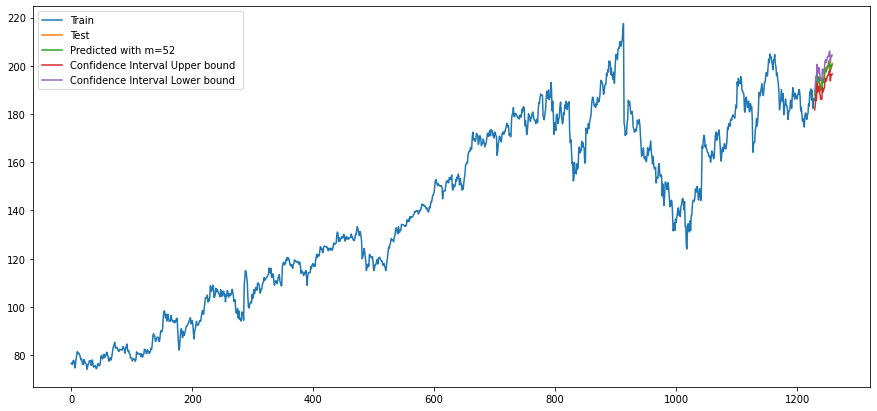

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 52


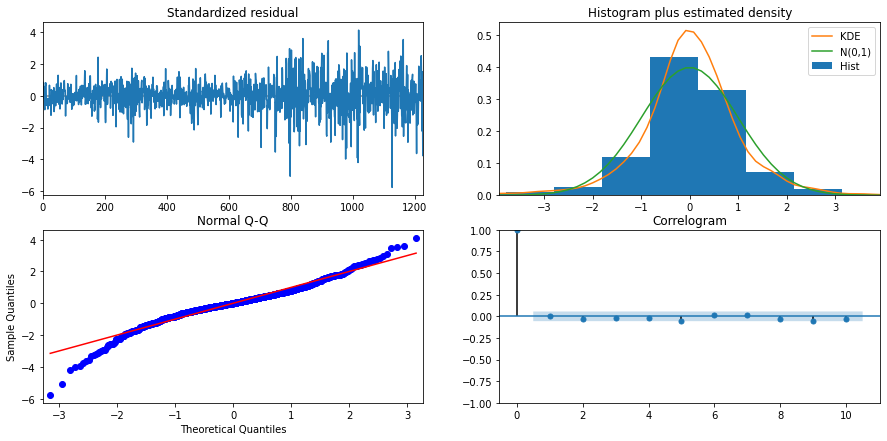

----------------------------------------------------------------------------------------------------


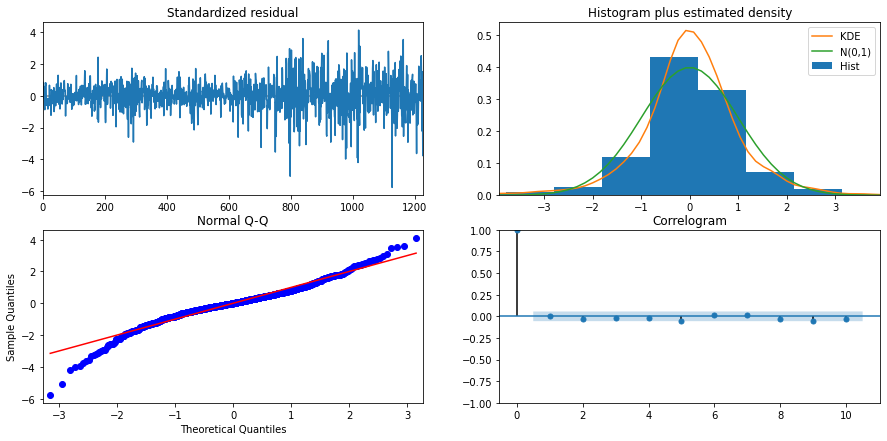

In [51]:


for m in [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMAX for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(actualtrain,exogenous =exotrain ,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=True,start_P=1,start_Q=1,max_P=7,max_D=7,max_Q=7,m=m,
    d=None,D=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast,conf_int = stepwise_model.predict(n_periods=30,exogenous =exotest,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(actualtest, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(actualtrain, label='Train ')
    plt.plot(actualtest, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    print("-"*100)

# **Autoregressive conditional heteroskedasticity model (ARCH)**

## Importing Relevant Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
sns.set()

## Loading the Data

In [53]:
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Rising 2021 Workshop/Notebooks/Time Series Forecasting using Baseline Methods/Index2018.csv')
raw_csv_data

date          spx       dax         ftse    nikkei
0     07/01/1994   469.900000   2224.95  3445.980000  18124.01
1     10/01/1994   475.270000   2225.00  3440.580000  18443.44
2     11/01/1994   474.130000   2228.10  3413.770000  18485.25
3     12/01/1994   474.170000   2182.06  3372.020000  18793.88
4     13/01/1994   472.470000   2142.37  3360.010000  18577.26
...          ...          ...       ...          ...       ...
6264  23/01/2018  2839.130362  13559.60  7731.827774  24124.15
6265  24/01/2018  2837.544008  13414.74  7643.428966  23940.78
6266  25/01/2018  2839.253031  13298.36  7615.839954  23669.49
6267  26/01/2018  2872.867839  13340.17  7665.541292  23631.88
6268  29/01/2018  2853.528411  13324.48  7671.533300  23629.34

[6269 rows x 5 columns]

In [54]:
df_comp = raw_csv_data.copy()

## Preprocessing the Data

In [55]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.drop(['spx', 'dax', 'nikkei'], axis = 1)
df_comp

ftse
date                   
1994-01-07  3445.980000
1994-01-10  3440.580000
1994-01-11  3413.770000
1994-01-12  3372.020000
1994-01-13  3360.010000
...                 ...
2018-01-23  7731.827774
2018-01-24  7643.428966
2018-01-25  7615.839954
2018-01-26  7665.541292
2018-01-29  7671.533300

[6269 rows x 1 columns]

In [56]:
df_comp['market_value'] = df_comp.ftse
del df_comp['ftse']

In [57]:
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')
df_comp

market_value
date                    
1994-01-07   3445.980000
1994-01-10   3440.580000
1994-01-11   3413.770000
1994-01-12   3372.020000
1994-01-13   3360.010000
...                  ...
2018-01-23   7731.827774
2018-01-24   7643.428966
2018-01-25   7615.839954
2018-01-26   7665.541292
2018-01-29   7671.533300

[6277 rows x 1 columns]

## Splitting the Data

In [58]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [59]:
df.tail()

market_value
date                    
2013-04-01       6411.74
2013-04-02       6490.66
2013-04-03       6420.28
2013-04-04       6344.11
2013-04-05       6249.77

In [60]:
df_test.head()

market_value
date                    
2013-04-08       6276.94
2013-04-09       6313.20
2013-04-10       6387.37
2013-04-11       6416.14
2013-04-12       6384.39

## LLR Test Function

In [61]:
from scipy.stats.distributions import chi2

In [62]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

## Augmented Dickey-Fuller Test

In [63]:
import statsmodels.tsa.stattools as sts

In [64]:
sts.adfuller(df.market_value)

(-1.9041551418836857,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54854.15304507557)

From the DF test we see that the market value prices for FTSE100 belong to a Non-Stationery Source, hence it is a better option to Extract the "Returns", check for stationarity and then work on them

## Computing and Storing Returns

Percentage change between the current and a prior element.

Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.

In [65]:
df['returns'] = df.market_value.pct_change(1).mul(100)

## Computing and Storing Squared Returns

In [66]:
df['sq_returns'] = df.returns.mul(df.returns)

## Returns v/s Squared returns

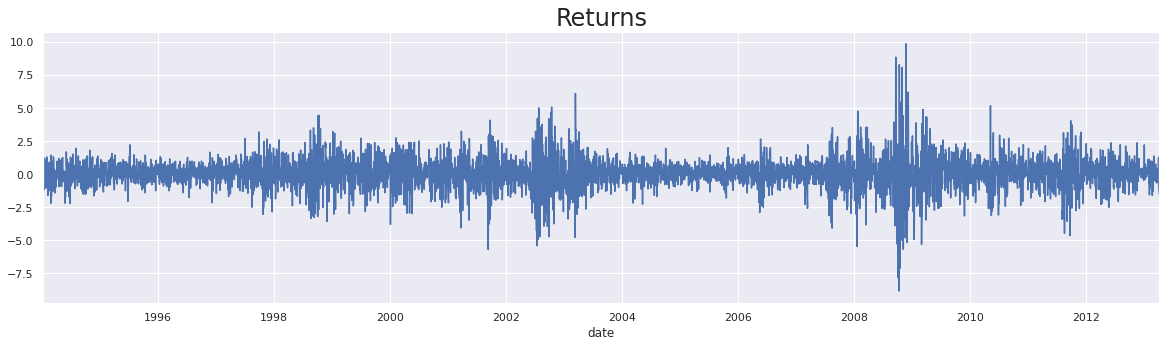

In [67]:
df.returns.plot(figsize = (20,5))
plt.title("Returns", size = 24)
plt.show()

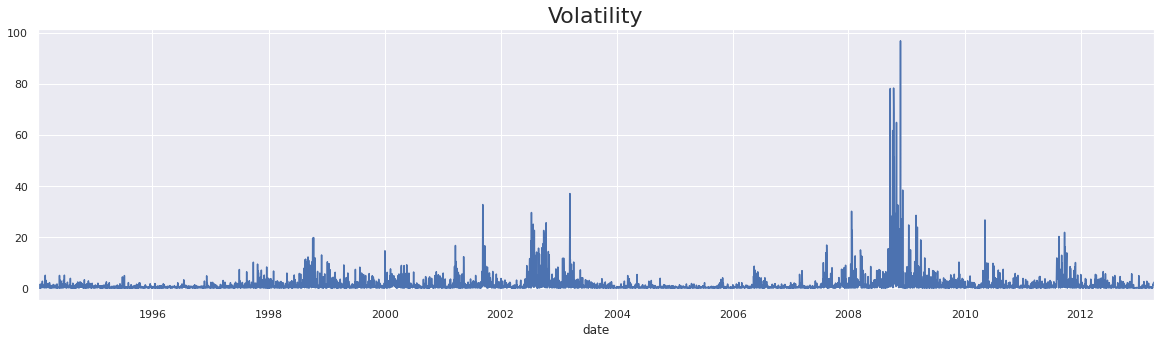

In [68]:
df.sq_returns.plot(figsize = (20,5))
plt.title("Volatility", size = 22)
plt.show()

## PACF

In [69]:
import statsmodels.graphics.tsaplots as sgt

In [70]:
sgt.plot_pacf(df.returns[1:], lags = 40, zero = False, method = ('ols'))
plt.title('PACF Returns', size = 22)
plt.show()

From the PACF for Volatility we can see that the first 6 cofficients are significant with the first 5 yeilding between 0.15 and 0.25

Such High significant values of partal autocorrelation among the first few lags suggests that there tend to be short term trends in variance
Another way of looking at it would be clustering. This suggests that there are periods of High Variation followed by periods of High Variation; Similarly,  there are periods of Low Variation followed by periods ofd Low Variation

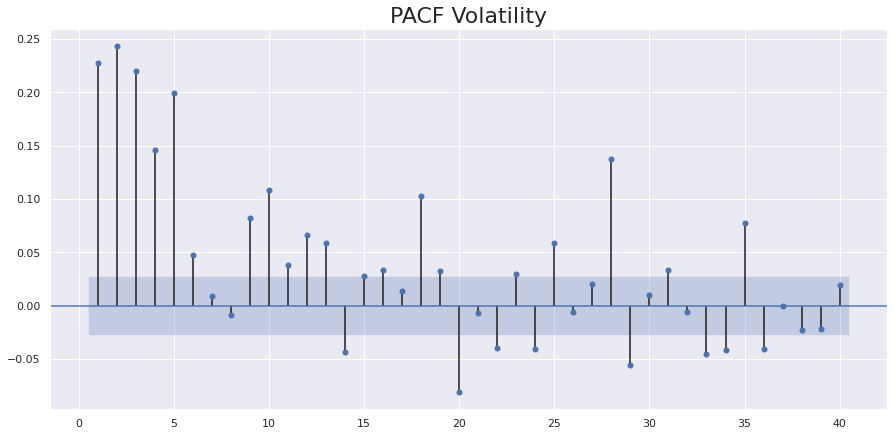

In [71]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Volatility", size = 22)
plt.show()

## The arch_model() Method

In [72]:
!pip install arch -U

     |████████████████████████████████| 808kB 7.0MB/s 


In [73]:
from arch import arch_model

This value just controls how frequently you get output. 5 indicates only report every 5th iteration. 1 would report each iteration. 0 turns reporting off.

In [74]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 6972.734736835859
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088042271316
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6970.058366189893
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Sat, May 22 2021   Df Residuals:                     5019
Time:                        07:28:00   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

## The Simple ARCH(1) Model

In [75]:
model_arch_1 = arch_model(df.returns[1:], 
                          mean = "Constant",
                          vol = "ARCH",
                          p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()


Iteration:      5,   Func. Count:     34,   Neg. LLF: 7660.088789377838
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Sat, May 22 2021   Df Residuals:                     5019
Time:                        07:28:00   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

## Higher Lag ARCH Models

## ARCH(2)

In [76]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 7449.870533644225
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Sat, May 22 2021   Df Residuals:                     5019
Time:                        07:28:00   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

## ARCH(3)

In [77]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 7278.805807411393
Iteration:     10,   Func. Count:     84,   Neg. LLF: 7277.050453152619
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 91
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Sat, May 22 2021   Df Residuals:                     5019
Time:                        07:28:00   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.316e-02      4.018  5.875e-05 [2.707e-02,7.865e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5012  2.834e-02     17.685  5.505e-70 [  0.446,  0.557]
alpha[1]       0.1570  2.649e-02      5.926  3.108e-09 [  0.105,  0.209]
alpha[2]       0.2197  2.588e-02      8.489  2.077e-17 [  0.169,  0.270]
alpha[3]       0.2804  3.354e-02      8.359  6.302e-17 [  0.215,  0.346]
========================================================================

Covariance estimator: robust
"""

# **Generalized autoregressive conditional heteroskedasticity model(GARCH)**

In [78]:
from arch import arch_model

## Simple GARCH(1,1) Model

In [79]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 6972.734736835859
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088042271316
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6970.058366189893
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Sat, May 22 2021   Df Residuals:                     5019
Time:                        07:28:01   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

We do not need to fit higher order GARCH models as the GARCH(1,1) model has been mathematically proven to be the best fit for market returns. Higher order GARCH models in this case will result in Non-Significant Variables

#**Vector Autoregression (VAR)**

VAR model is a stochastic process that represents a group of time-dependent variables as a linear function of their own past values and the past values of all the other variables in the group.

For instance, we can consider a bivariate time series analysis that describes a relationship between hourly temperature and wind speed as a function of past values [2]:

temp(t) = a1 + w11* temp(t-1) + w12* wind(t-1) + e1(t-1)

wind(t) = a2 + w21* temp(t-1) + w22*wind(t-1) +e2(t-1)

where a1 and a2 are constants; w11, w12, w21, and w22 are the coefficients; e1 and e2 are the error terms.

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
data = sm.datasets.macrodata.load_pandas().data
data.head(2)

year  quarter   realgdp  realcons  ...  unemp      pop  infl  realint
0  1959.0      1.0  2710.349    1707.4  ...    5.8  177.146  0.00     0.00
1  1959.0      2.0  2778.801    1733.7  ...    5.1  177.830  2.34     0.74

[2 rows x 14 columns]

The data contains a number of time-series data, we take only two time-dependent variables “realgdp” and “realdpi” for experiment purposes and use “year” columns as the index of the data.

In [81]:
data1 = data[["realgdp", 'realdpi']]
data1.index = data["year"]

Let's visualize the data:

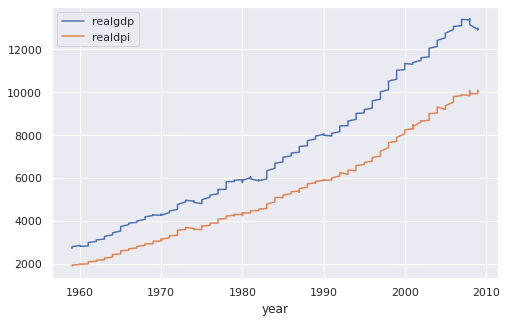

In [82]:
data1.plot(figsize = (8,5))

Both of the series show an increasing trend over time with slight ups and downs.

##**Stationary**
Before applying VAR, both the time series variable should be stationary. Both the series are not stationary since both the series do not show constant mean and variance over time. We can also perform a statistical test like the Augmented Dickey-Fuller test (ADF) to find stationarity of the series using the AIC criteria.

In [83]:
from statsmodels.tsa.stattools import adfuller
adfuller_test = adfuller(data1['realgdp'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: 1.7504627967647186
p-value: 0.9982455372335032


In [84]:
adfuller_test = adfuller(data1['realdpi'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: 2.9860253519546855
p-value: 1.0


In both cases, the p-value is not significant enough, meaning that we can not reject the null hypothesis and conclude that the series are non-stationary

##**Differencing**

As both the series are not stationary, we perform differencing and later check the stationarity.

In [85]:
data_d = data1.diff().dropna()

In [86]:
adfuller_test = adfuller(data_d['realgdp'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -6.305695561658105
p-value: 3.327882187668224e-08


The “realgdp” series becomes stationary after first differencing of the original series as the p-value of the test is statistically significant

In [87]:
adfuller_test = adfuller(data_d['realdpi'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -8.864893340673007
p-value: 1.4493606159108096e-14


The “realgdp” series becomes stationary after first differencing of the original series as the p-value of the test is statistically significant

## **Model**

In this section, we apply the VAR model on the one differenced series. We carry-out the train-test split of the data and keep the last 10-days as test data.

In [88]:
train = data_d.iloc[:-10,:]
test = data_d.iloc[-10:,:]

### **Searching optimal order of VAR model**

In the process of VAR modeling, we opt to employ Information Criterion Akaike (AIC) as a model selection criterion to conduct optimal model identification. In simple terms, we select the order (p) of VAR based on the best AIC score. The AIC, in general, penalizes models for being too complex, though the complex models may perform slightly better on some other model selection criterion. Hence, we expect an inflection point in searching the order (p), meaning that, the AIC score should decrease with order (p) gets larger until a certain order and then the score starts increasing. For this, we perform grid-search to investigate the optimal order (p).

In [89]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

In the first line of the code: we train VAR model with the training data. Rest of code: perform a for loop to find the AIC scores for fitting order ranging from 1 to 10. We can visualize the results (AIC scores against orders) to better understand the inflection point:

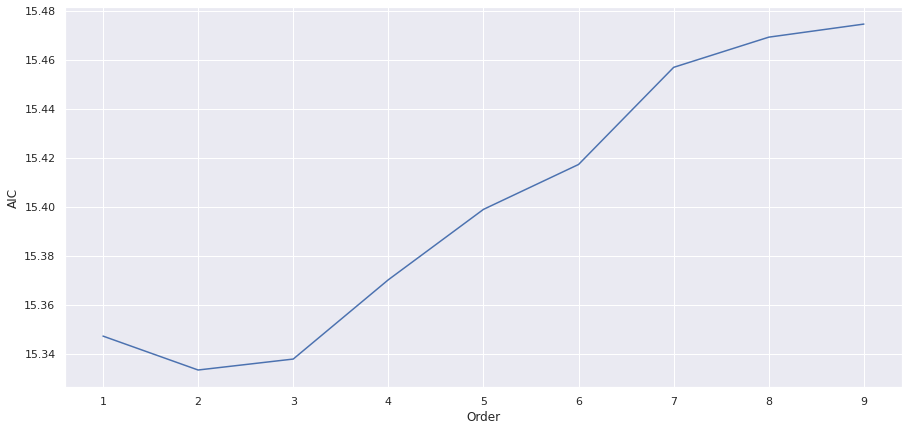

In [90]:
import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

From the plot, the lowest AIC score is achieved at the order of 2 and then the AIC scores show an increasing trend with the order p gets larger. Hence, we select the 2 as the optimal order of the VAR model. Consequently, we fit order 2 to the forecasting model.

let's check the summary of the model:

In [91]:
results = forecasting_model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 22, May, 2021
Time:                     07:28:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.5043
Nobs:                     190.000    HQIC:                   15.4026
Log likelihood:          -1985.87    FPE:                4.56270e+06
AIC:                      15.3334    Det(Omega_mle):     4.33171e+06
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             23.807343         6.111430            3.896           0.000
L1.realgdp         0.176227         0.078131            2.256           0.024
L1.realdpi         0.213713         0.085309            2.505         

## **Forecasting**

We use 2 as the optimal order in fitting the VAR model. Thus, we take the final 2 steps in the training data for forecasting the immediate next step (i.e., the first day of the test data).

Now, after fitting the model, we forecast for the test data where the last 2 days of training data set as lagged values and steps set as 10 days as we want to forecast for the next 10 days.

In [92]:
laaged_values = train.values[-2:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=10), index = test.index, columns= ['realgdp_1d', 'realdpi_1d'])
forecast

realgdp_1d  realdpi_1d
year                          
2007.0   61.872982   47.739232
2007.0   53.948996   41.742951
2007.0   56.171082   42.552316
2008.0   54.953081   42.023999
2008.0   55.109616   42.001007
2008.0   54.865410   41.937065
2008.0   54.841362   41.893996
2009.0   54.775171   41.878378
2009.0   54.754309   41.859837
2009.0   54.732404   41.853481

We have to note that the aforementioned forecasts are for the one differenced model. Hence, we must reverse the first differenced forecasts into the original forecast values.

In [93]:
forecast["realgdp_forecasted"] = data1["realgdp"].iloc[-10-1] +  forecast['realgdp_1d'].cumsum()
forecast["realdpi_forecasted"] = data1["realdpi"].iloc[-10-1] + forecast['realdpi_1d'].cumsum() 

In [94]:
forecast

realgdp_1d  realdpi_1d  realgdp_forecasted  realdpi_forecasted
year                                                                  
2007.0   61.872982   47.739232        13161.773982         9877.939232
2007.0   53.948996   41.742951        13215.722978         9919.682183
2007.0   56.171082   42.552316        13271.894060         9962.234500
2008.0   54.953081   42.023999        13326.847141        10004.258499
2008.0   55.109616   42.001007        13381.956757        10046.259506
2008.0   54.865410   41.937065        13436.822166        10088.196571
2008.0   54.841362   41.893996        13491.663528        10130.090566
2009.0   54.775171   41.878378        13546.438699        10171.968945
2009.0   54.754309   41.859837        13601.193008        10213.828781
2009.0   54.732404   41.853481        13655.925412        10255.682262

The first two columns are the forecasted values for 1 differenced series and the last two columns show the forecasted values for the original series.

Now, we visualize the original test values and the forecasted values by VAR.

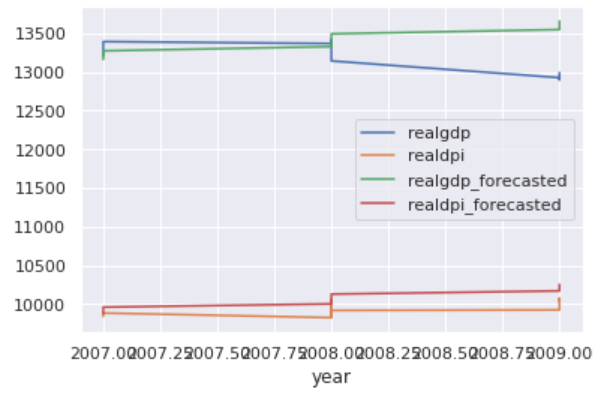